# EOSC 511 Lab7

# Xiaoxin (Cindy) Yu

## List of Problems ##
- [Problem 2](#Problem-Two): Stability of the difference scheme
- [Problem 4](#Problem-Four): Choosing most accurate grid
- [Problem 5](#Problem-Five): Numerical solution for no y variation

In [1]:
from IPython.display import Image
import IPython.display as display
import matplotlib.pyplot as plt
% matplotlib inline  
import numpy as np
from numlabs.lab7 import quiz7 as quiz
from numlabs.lab7 import rain
from numlabs.lab7 import accuracy2d
from numlabs.lab7 import interactive1
from numlabs.lab7 import dispersion_2d

*Problem Two*
-------------
[lab7:prob:stability]:(#Problem-Two)
> a) Find the CFL condition (in seconds) for $dt$
for the Python example in Problem One.
<!--- [lab7:prob:staggered]---> Test your
value. 

> b) Find the CFL condition (in seconds) for $dt$ for the Python
example in *rain.py*, ie., for the non-staggered grid. Test your value.

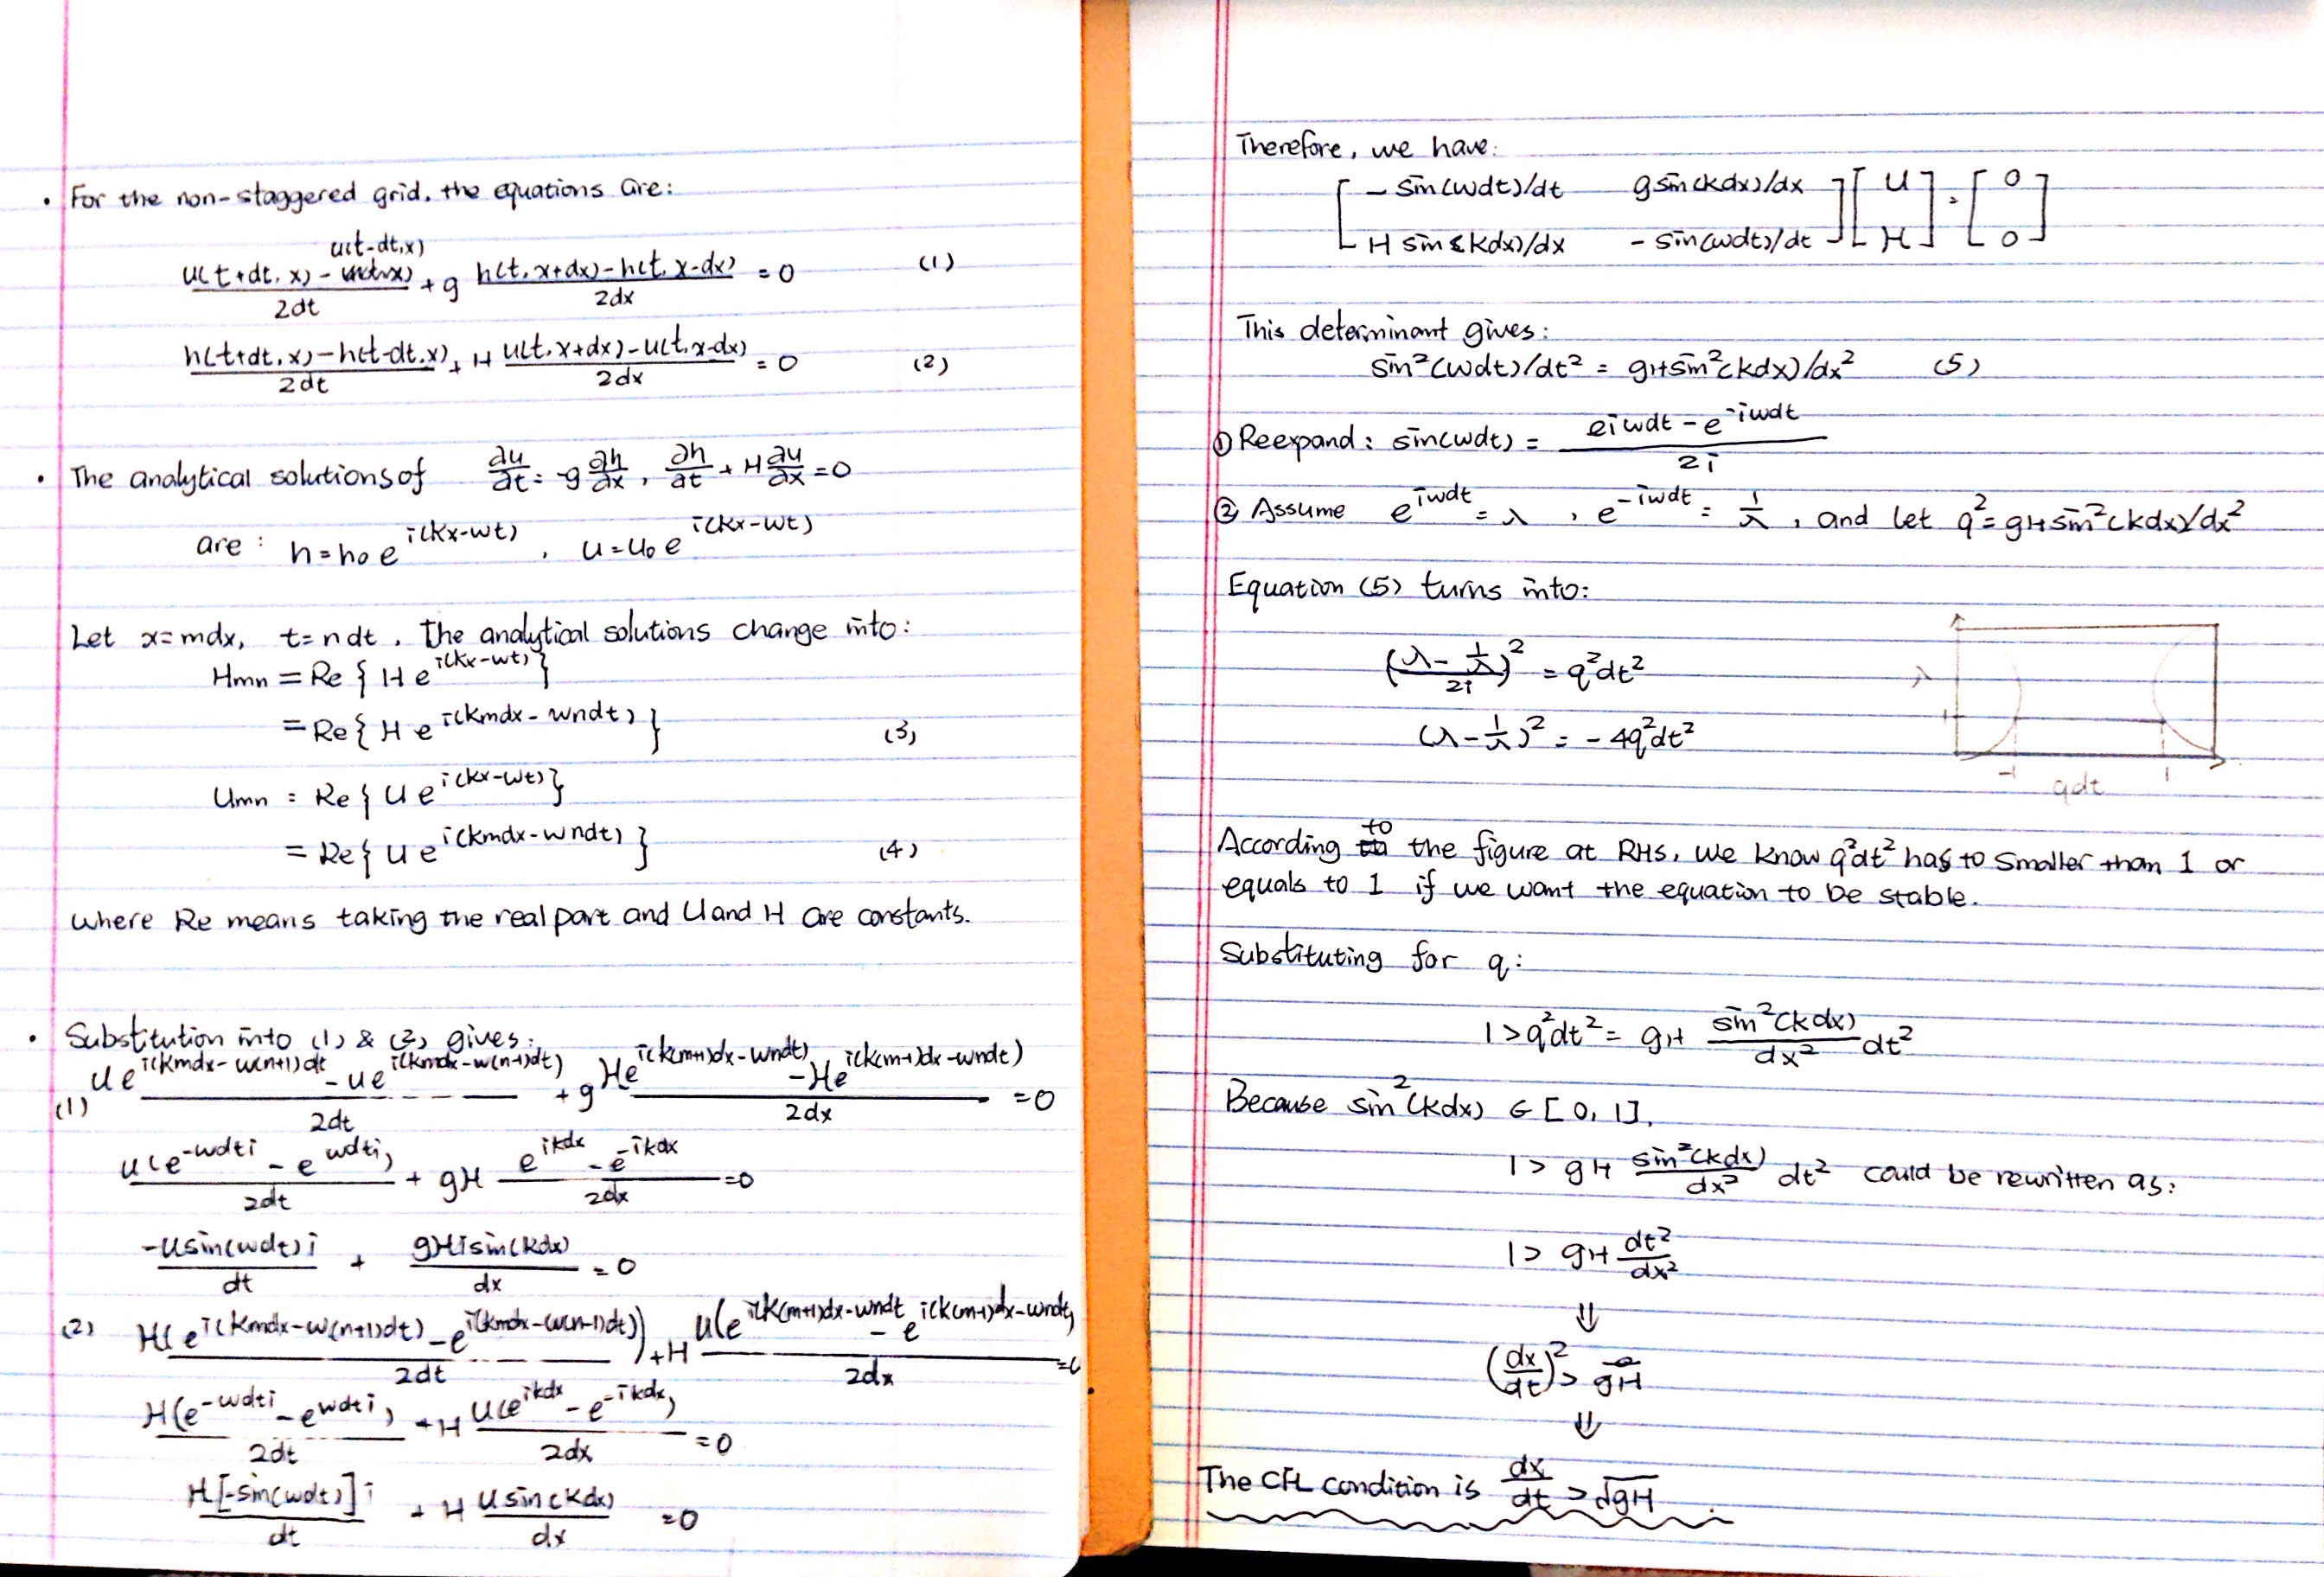

In [1]:
from IPython.display import Image
Image(filename="lab7/lab7.JPG")

**Test the condition:**

**(1) Stable State:** dx/dt> $\sqrt{gH}$

In this case, dx/dt> $\sqrt{gH}$, which satisfies the CFL condition. The solution prefectly explains how the surface height changes after a large drop of water lands. And the value of u and h is in a reasonable range. It's a stable solution.

dx/dt         :41.30495168499706
Critical Value:31.304951684997057


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


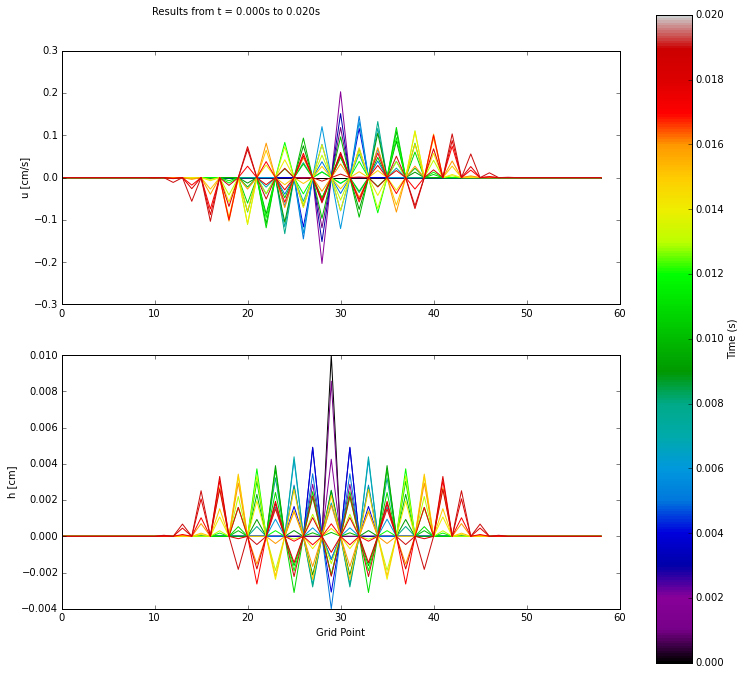

In [78]:
additional_dx=0.01
rain([20,59])

**Stable State:** dx/dt= $\sqrt{gH}$

In this case, dx/dt= $\sqrt{gH}$, which is right at the critical point. The solution is not as accurate as previous one but the value of u and h is still reasonable. 

dx/dt         :31.304951684997057
Critical Value:31.304951684997057


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


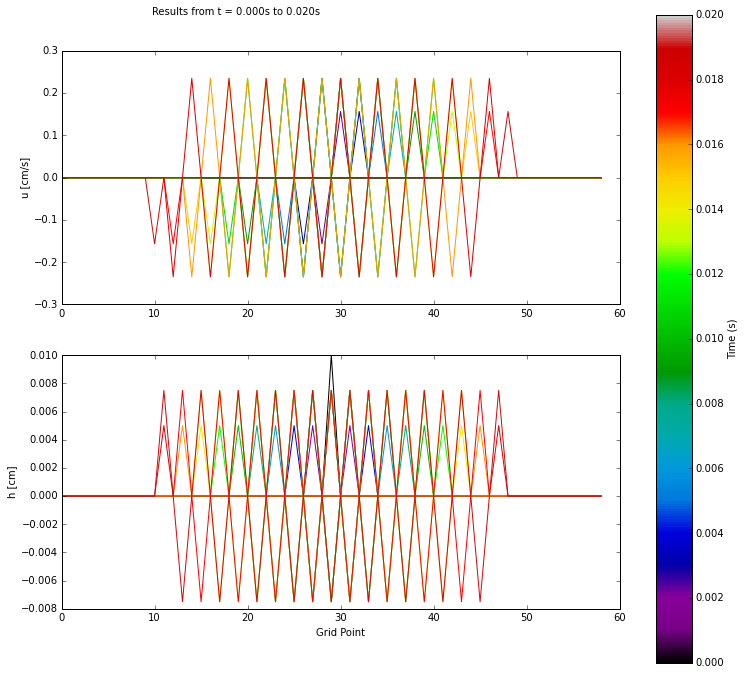

In [79]:
additional_dx=0
rain([20,59])

**Unstable:** dx/dt< $\sqrt{gH}$.

In this case, dx/dt< $\sqrt{gH}$. The magnitude of u and h is super large. This is unrealistic result means the numerical solution is no longer stable.

dx/dt         :21.304951684997054
Critical Value:31.304951684997057


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


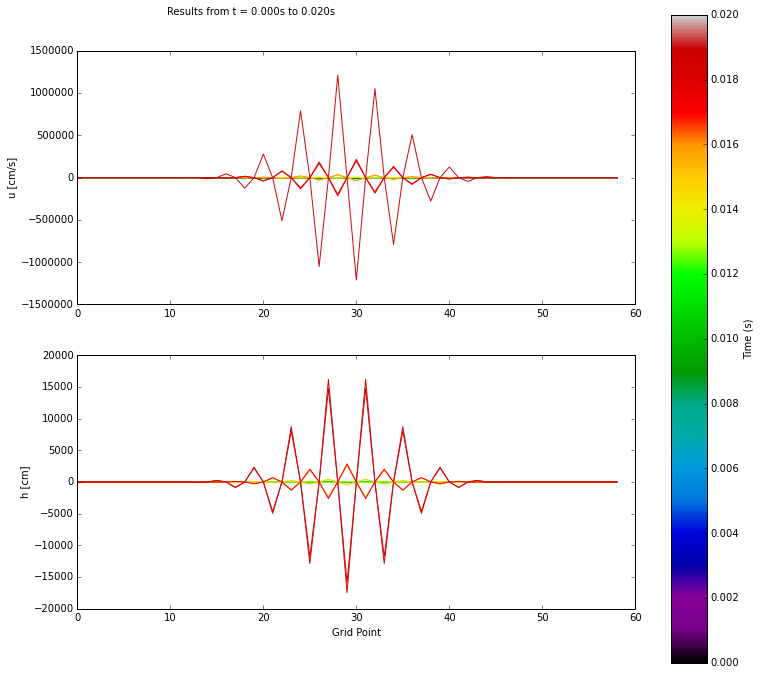

In [80]:
additional_dx=-0.01
rain([20,59])

*Problem Four*
--------------
[lab7:prob:accurate]:(#Problem-Four) 
> Which grid gives the best accuracy for $d=R/2$?
Explain in what ways it is more accurate.


**According to cell [101]**, we can see the accuracy in both grids is not good for short waves ($k$ large) but the grid 2 is slightly better.

Both of the grids have good accuracy in the long wave. If we zoom in to observe their behavior in the long wave (**cell [104]**), we find grid2 is still more accurate than the grid1. Therefore, we will use grid2 in problem five.

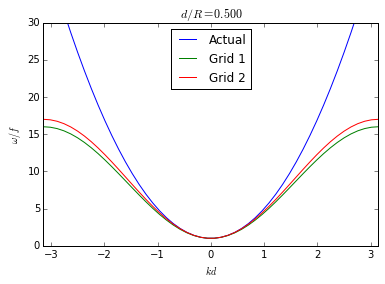

In [101]:
main(0.5,[-np.pi, np.pi],[0,30])

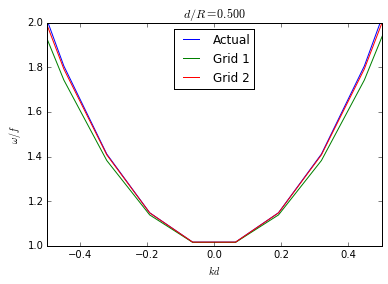

In [104]:
main(0.5,[-0.5, 0.5],[1,2])

*Problem Five*
-------------
[lab7:prob:noy]:(#Problem-Five)
> Modify *rain.py* to solve equations
([No variation in y, first eqn](#lab7:sec:firsteq)), ([No variation in y, second eqn](#lab7:sec:secondeq)) and ([No variation in y, third eqn](#lab7:sec:thirdeq)) on the most accurate
grid.


<div id='lab7:sec:firsteq'>
**The equations we are going to solve is:**
$$\frac{\partial u}{\partial t} - fv = -g\frac{\partial h}{\partial x}$$ 
</div><div id='lab7:sec:secondteq'>
$$\frac{\partial v}{\partial t} + fu = 0$$
</div><div id='lab7:sec:thirdeq'>
$$\frac{\partial h}{\partial t} + H\frac{\partial u}{\partial x} = 0$$
</div>



**I set the initial conditions as**: $$h_{x_{mid}}(0) = h_{0}$$
$$u(0) = 0$$
$$v(0) = 0$$

The **boundary conditions** are : (assume there is a wall at $x_{0}$ and $x_{end}$) $$u_{x_{0}}(t) = 0$$ $$u_{x_{end}}(t) = 0$$

**According to all the governing equation, BC and IC above, I modified code below to calculation this problem.**

In [122]:
from __future__ import division
import copy
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.colorbar as colorbar
import os,glob

class Quantity(object):
    def __init__(self, n_grid, n_time):
        self.n_grid = n_grid
        self.prev = np.empty(n_grid)
        self.now = np.empty(n_grid)
        self.next = np.empty(n_grid)
        self.store = np.empty((n_grid, n_time))


    def store_timestep(self, time_step, attr='next'):
        self.store[:, time_step] = self.__getattribute__(attr)


    def shift(self):
        self.prev = copy.copy(self.now)
        self.now = copy.copy(self.next)


def initial_conditions(gu,gh,u, v, h, ho):
    u.prev[:] = 0
    v.prev[:] = 0
    h.prev[:] = 0
    h.prev[len(h.prev) // 2] = ho


def boundary_conditions(u_array, v_array, h_array, n_grid):
    u_array[0] = 0
    u_array[n_grid - 1] = 0
    
    v_array[0] = v_array[1]
    v_array[n_grid - 1] = v_array[n_grid-2]
    
    h_array[0] = h_array[1]
    h_array[n_grid-1] = h_array[n_grid-2]


def first_time_step(u, v, h, g, H, dt, dx, ho, gu, gh, n_grid):
    u.now[1:n_grid - 1] = 0
    factor = gu * ho / 2
    midpoint = n_grid // 2
    u.now[midpoint - 1] = -factor
    u.now[midpoint + 1] = factor
    v.now[1:n_grid - 1] = 0
    h.now[1:n_grid - 1] = 0
    h.now[midpoint] = ho - g * H * ho * dt ** 2 / ( dx ** 2)


def leap_frog(u, v, h, gu, gh, gv, n_grid):
    for pt in np.arange(1, n_grid - 1):
        f=1e-4 
        u.next[pt] = u.prev[pt] - gu * (h.now[pt + 1] - h.now[pt])+f*v.now[pt]
        v.next[pt] = v.prev[pt] - gv * u.now[pt]
        h.next[pt] = h.prev[pt] - gh * (u.now[pt] - u.now[pt - 1])

def make_graph(u, v, h, dt, n_time):
    fig, (ax_u, ax_v, ax_h) = plt.subplots(3,1, figsize=(10,10))
    the_title = fig.text(0.25, 0.95, 'Results from t = %.3fs to %.3fs' % (0, dt*n_time))
    ax_u.set_ylabel('u [cm/s]')
    ax_v.set_ylabel('v [cm/s]')
    ax_h.set_ylabel('h [cm]')
    ax_h.set_xlabel('Grid Point')
    
    cmap = plt.get_cmap('spectral')
    cNorm  = colors.Normalize(vmin=0, vmax=1.*n_time)
    cNorm_inseconds = colors.Normalize(vmin=0, vmax=1.*n_time*dt)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

    interval = np.int(np.ceil(n_time/20))

    for time in range(0, n_time, interval):
        colorVal = scalarMap.to_rgba(time)
        ax_u.plot(u.store[:, time], color=colorVal)
        ax_v.plot(v.store[:, time], color=colorVal)
        ax_h.plot(h.store[:, time], color=colorVal)

    ax2 = fig.add_axes([0.95, 0.05, 0.05, 0.9])
    cb1 = colorbar.ColorbarBase(ax2, cmap=cmap, norm=cNorm_inseconds)
    cb1.set_label('Time (s)')
    return

def rain(args):

    n_time = int(args[0])
    n_grid = int(args[1])

    g = 980                     # acceleration due to gravity [cm/s^2]
    H = 1                       # water depth [cm]
    dt = 0.001                  # time step [s]
    dx = 1        # grid spacing [cm]
    ho = 0.01  
    f = 1e-4                           # initial perturbation of surface [cm]                         
    gu = 2 * g * dt / dx           # first handy constant
    gh = 2 * H * dt / dx           # second handy constant
    gv = 2 * f * dt

    u = Quantity(n_grid, n_time)
    v = Quantity(n_grid, n_time)
    h = Quantity(n_grid, n_time)

    initial_conditions(gu , gh, u, v, h, ho)
    u.store_timestep(0, 'prev')
    v.store_timestep(0, 'prev')
    h.store_timestep(0, 'prev')

    first_time_step(u, v, h, g, H, dt, dx, ho, gu, gh, n_grid)
    boundary_conditions(u.now, v.now, h.now, n_grid)
    u.store_timestep(1, 'now')
    v.store_timestep(1, 'now')
    h.store_timestep(1, 'now')

    for t in np.arange(2, n_time):
        leap_frog(u, v, h, gu, gh, gv, n_grid)
        boundary_conditions(u.next, v.next, h.next, n_grid)
        u.store_timestep(t)
        v.store_timestep(t)
        h.store_timestep(t)
        u.shift()
        v.shift()
        h.shift()

    # Plot the results as colored graphs
    make_graph(u, v, h, dt, n_time)
    return


if __name__ == '__main__':
    if len(sys.argv) == 1 or 'sphinx-build' in sys.argv[0]:
        rain((50, 9))
    elif len(sys.argv) == 3:
        rain(sys.argv[1:])


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


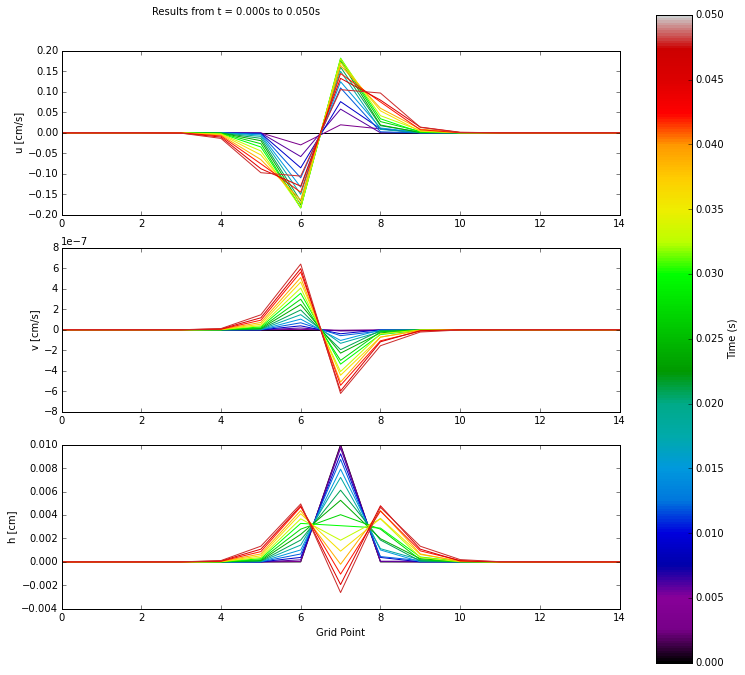

In [139]:
rain([50,15])

**From cell [139]** (t =0s to 0.05s), we can see:

**(1)**The figure shows that the surface height in the  middle (the third plot)  decreased which triggers the motion (the first and second plots) at its both sides. The motion dissipate with time and it moves farther away from the centre.

**(2)**The u velocity is faster than the v velocity. Because the surface high will first activate the u velocity and then u starts the motion in v (See the equation). Because the coriolis force parameter f is small (say f=1e-4), the motion of v is weak.

**(3)** u=0 and v=0 are at approximate x=6.5 (from the first two plots), while the h=h0 is at x=7.0 (the third plot), which means u and v are in the same grid but h is in its own grid.

For more plots, see below.

/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


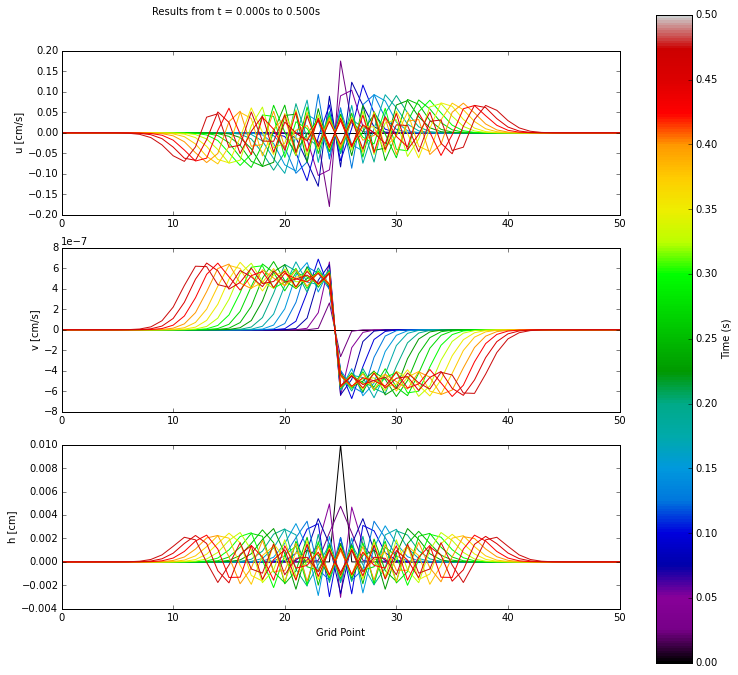

In [141]:
rain([500,51])

/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


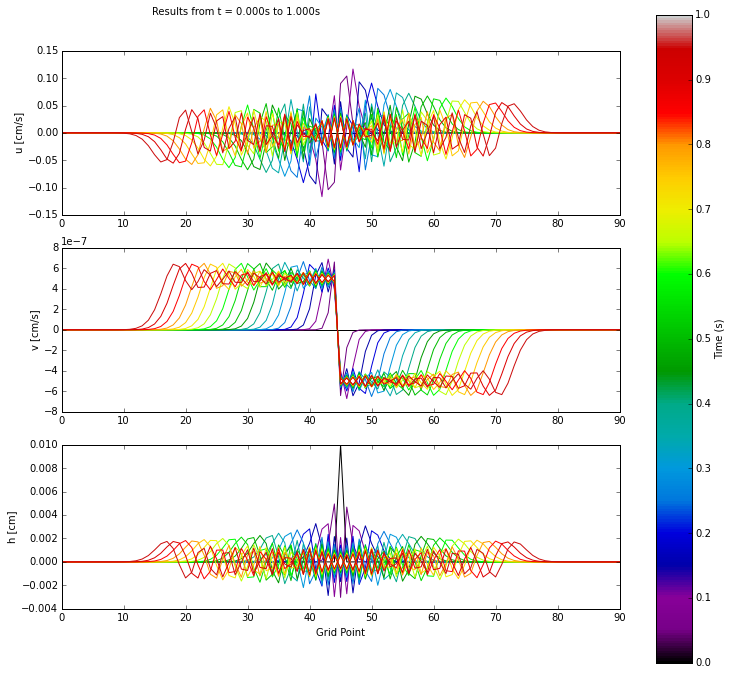

In [146]:
rain([1000,91])